In [2]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
from mnist import MNIST
import random

#reading dataset image (16x16)
# img = cv2.imread('1.png', 0)
mndata = MNIST('mnist')

images, labels = mndata.load_training()
index = random.randrange(0, len(images))  # choose an index ;-)
print(mndata.display(images[index]))
imgflat = images[index]
img = np.reshape(imgflat, (28, 28))

#defining time frame of 1s with steps of 5ms
T = 1;
dt = 0.005
time  = np.arange(0, T+dt, dt)
num_steps = round(T / dt) # 200
img_width = len(img) # 28
if (img_width != len(img[0])) print("Error! Image is not square") # we assume height and width are equal

#initializing spike train
base_train = np.zeros((img_width, img_width, num_steps))

uni_train = np.copy(base_train)
poisson_train = np.copy(base_train)
poisson_isi_train = np.copy(base_train)
for i in range(img_width):
    for j in range(img_width):
        pixel_value = img[i][j]
        uni_isi = 
        poisson_isi = 
        poisson_isi_isi = 
        for k in range(num_steps):
            if k % uni_isi == 0:
                uni_train[i][j][k] = 1
            if k % poisson_isi == 0:
                poisson_train[i][j][k] = 1
            if k % poisson_isi_isi == 0:
                poisson_isi_train[i][j][k] = 1

In [36]:
total_spikes = round(T / dt)
for i in range(784):
    temp = np.zeros(total_spikes)
    normalized_px = ( imgflat[i] / 256 )
    if normalized_px > 0:
        num_spikes = round(total_spikes * normalized_px)
        f_spike = round(T / normalized_px)
        for j in range(num_spikes):
            if j*f_spike < total_spikes:
                temp[j*f_spike] = 1
    train.append(temp)

254


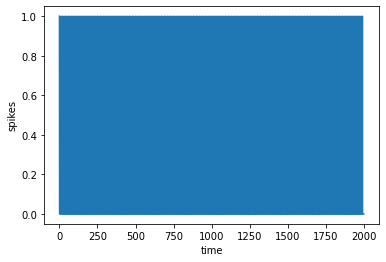

In [39]:
# show the spike train output
# and plot it in a graph
ind = 629
print(imgflat[ind])
plt.plot(train[ind])
plt.ylabel("spikes")
plt.xlabel("time")
plt.show()

In [3]:
# Sliding window implementation of receptive field
w = np.zeros([5,5])
pot = np.zeros([28,28])
ran = [-2,-1,0,1,2]
ox = 2
oy = 2
w[ox][oy] = 1

for i in range(5):
	for j in range(5):
		d = abs(ox-i) + abs(oy-j)
		w[i][j] = (-0.375)*d + 1

In [22]:
# a = np.zeros((2, 2, 3))
# b = np.copy(a)
# b[1][1][2] = 1
b

array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 1.]]])